# KMC log analysis

In [ ]:
# Utilizar o arquivo Simulation_forster_singlet_.txt 
# Ler os log para fazer analises básicas (contar mortes,trpl,etc)


# Header - basic info

In [24]:
import pandas as pd
import numpy as np

log_file = 'Simulation_forster_singlet_.txt'

data = pd.read_csv(log_file, delim_whitespace=True)
data = data[data.Time != 'END'] #removes the end of round lines
#total_deaths = data[(data.CausaMortis == "fluor") | (data.CausaMortis == 'phosph') | (data.CausaMortis == 'nonrad')]

# Average lifetime calculator:
def avg_lifetime(total_deaths):
    total_deaths = data[(data.CausaMortis == "fluor") | (data.CausaMortis == 'phosph') | (data.CausaMortis == 'nonrad')]
    lifetime = total_deaths['Time'].to_numpy(float)
    avg_life = np.mean(lifetime)
    return avg_life

# Diffusion Length calculator:
def ld_calculator(total_deaths):
    total_deaths = data[(data.CausaMortis == "fluor") | (data.CausaMortis == 'phosph') | (data.CausaMortis == 'nonrad')]
    dx = total_deaths['DeltaX'].to_numpy(float)
    dy = total_deaths['DeltaY'].to_numpy(float)
    dz = total_deaths['DeltaZ'].to_numpy(float)
    diffusion_length = np.sqrt(np.mean(dx**2+dy**2+dz**2))
    return diffusion_length

Ld  = ld_calculator(total_deaths)
tau = avg_lifetime(total_deaths)
print('Average lifetime is:', tau, 'ps')
print('Diffusion length is:', Ld, 'AA')

#avg
#dead

#data

Average lifetime is: 9937.2967462241 ps
Diffusion length is: 27.19926710189082 AA


# Normalized TRPL Generator

The fitted lifetime is: 9.957849645686025 ns


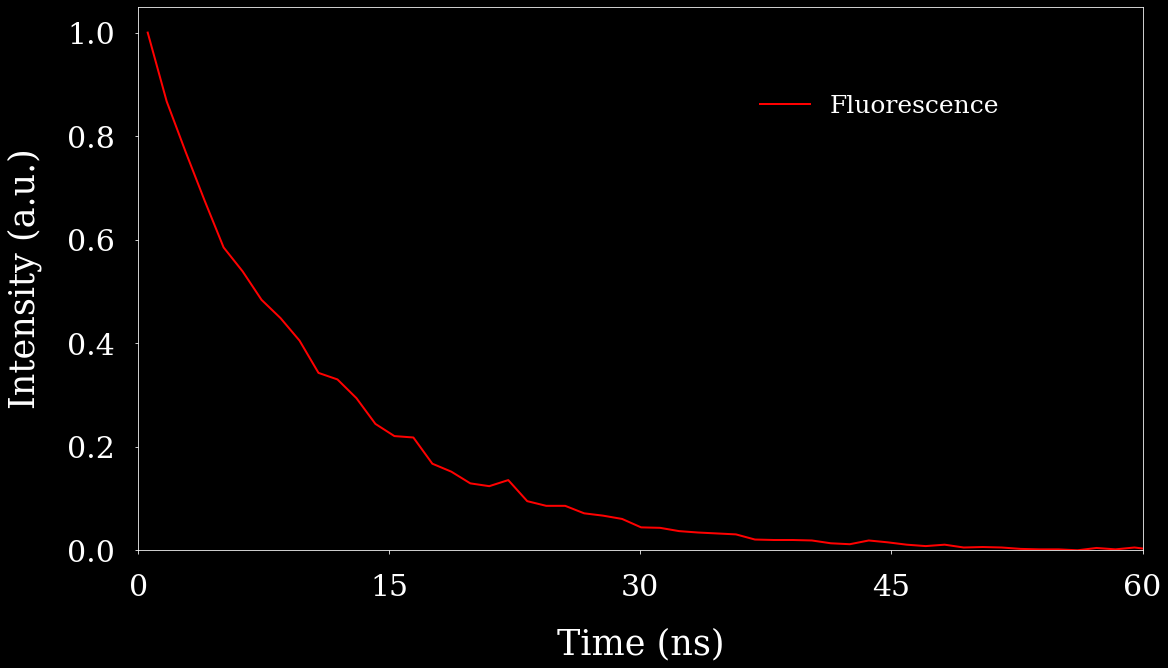

In [133]:
import matplotlib.pyplot as plt
from matplotlib import style
import scipy.optimize as spopt 
style.use('dark_background')

fluorescence = data[data.CausaMortis == 'fluor']
fluorescence = fluorescence['Time'].to_numpy(float)
hist, bins = np.histogram(fluorescence, bins=75) 

#Due to hist and bins having difference sizes, we adjust by taking the center part of the bins
bins = bins[:-1] + (bins[1:]-bins[:-1])/2

#Plot generator:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
fig, ax = plt.subplots()
fig.set_size_inches(18,10)

ax.plot(bins/1000,hist/max(hist),lw=2, color='red', label='Fluorescence')   #Defines the data set and normalizes the y axes
ax.set_xlabel("Time (ns)", fontsize=35,labelpad=25)                          #Defines the x axis' label parameters
ax.set_ylabel("Intensity (a.u.)", fontsize=35,labelpad=25)                   #Defines the y axis' label parameters
ax.set_xlim([0,60])                                                          #Defines the x range
ax.set_xticks([0,15,30,45,60])                                               #Defines the x ticks step
ax.tick_params(axis='x', labelsize=30, pad=20)                               #Customizes the x ticks (axis,size,vertical offset)  
ax.set_ylim([0,1.05])                                                        #Defines the y range
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])                                       #Defines the y ticks step
ax.tick_params(axis='y', labelsize=30, pad=20)                               #Customizes the y ticks (axis,size,horizontal offset)  
legx= ax.legend(bbox_to_anchor=(0.88,0.88), fontsize=25, frameon=False )
#ax.ticklabel_format(axis='x', style="sci", scilimits=(0,0))

#Define the fitting function:
def monoExp(x,a,t):
    return a*np.exp(-x/t)

#Initial guess for the parameters:
initial_params=[1.0,10.0]

#Performs the curve fit:
popt, pcov = spopt.curve_fit(monoExp,bins/1000,hist/max(hist))

#Prints the fit parameters:
print('The fitted lifetime is:', t,'ns')